# Задание
Используя данные из архива data.zip попробуйте обучить модель SARIMA для всех трех наборов данных. Попробуйте подобрать наилучшие коэффициенты самостоятельно или использую auto_arima. Попробуйте добавить в модель дополнительную переменную “День недели”, оцените как изменилась точность модели после этого. 


# Seasonal ARIMA Models


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Seasonal time series
Сезонные данные
     - Имеет предсказуемые и повторяющиеся шаблоны
     - Повторяется через любое количество времени
- Сезонное разложение
     - временной ряд = тренд + сезонность + остатки

### Seasonal decompose
Вы можете представить себе временной ряд как состоящий из трендовых, сезонных и остаточных компонентов. Это может быть хорошим способом подумать о данных, когда вы приступите к их моделированию. Если вы знаете период временного ряда, вы можете разложить его на эти компоненты.

В этом упражнении вы разложите временной ряд, показывающий ежемесячное производство молока на одну корову в США. Это даст вам более четкое представление о тренде и сезонном цикле. Поскольку данные ежемесячные, вы можете догадаться, что сезонность может составлять 12 периодов времени, однако это не всегда так.

In [ ]:
milk_production = pd.read_csv('milk_production.csv', index_col='Month', parse_dates=True)
milk_production.columns = ['_','pounds_per_cow']
#milk_production = milk_production.asfreq('MS')
milk_production.head()

,_,pounds_per_cow
Month,,
1962-01-01,0,589
1962-02-01,1,561
1962-03-01,2,640
1962-04-01,3,656
1962-05-01,4,727


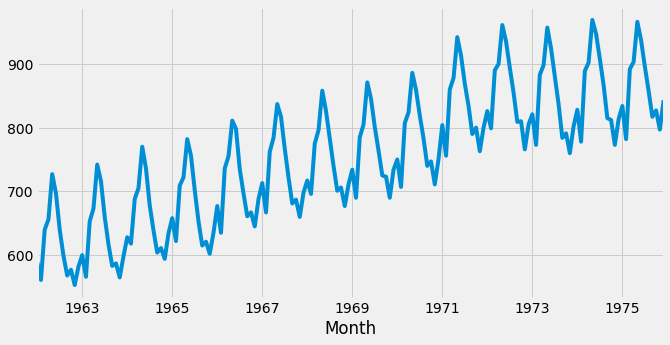

In [ ]:
milk_production.pounds_per_cow.plot()

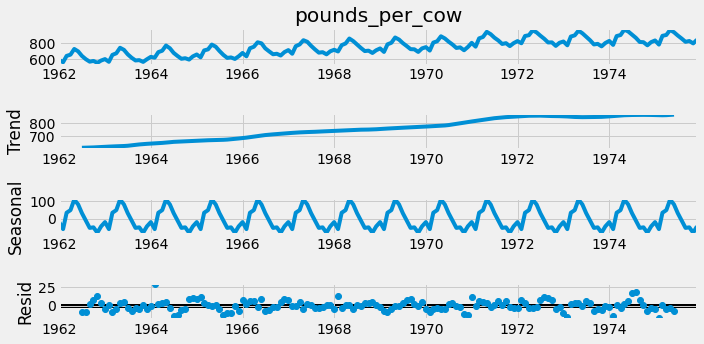

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], period=12)

# Plot decomposition
decomp.plot();
plt.tight_layout();

## SARIMA models
- Seasonal ARIMA = SARIMA
$$ \text{SARIMA}(p, d, q)(P, D, Q)_S $$
    - Non-seasonal orders
        - p: autoregressive order
        - d: differencing order
        - q: moving average order
    - Seasonal orders
        - P: seasonal autoregressive order
        - D: seasonal differencing order
        - Q: seasonal moving average order
        - S: Number of time steps per cycle
- The SARIMA model
    - ARIMA(2, 0, 1) model:
$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + m_1 \epsilon_{t-1} + \epsilon_t $$
    - $\text{SARIMA}(0,0,0)(2, 0, 1)_7$ model:
$$ y_t = a_7 y_{t-7} + a_{14} y_{t-14} + m_y \epsilon_{t-7} + \epsilon_t $$

- Seasonal differencing
    - Subtract the time series value of one season ago
$$ \Delta y_t = y_t - y_{t-S} $$

### Обучение SARIMA 
.

In [ ]:
df1 = pd.read_csv('AirPassengers.csv', index_col=0, parse_dates=True)
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


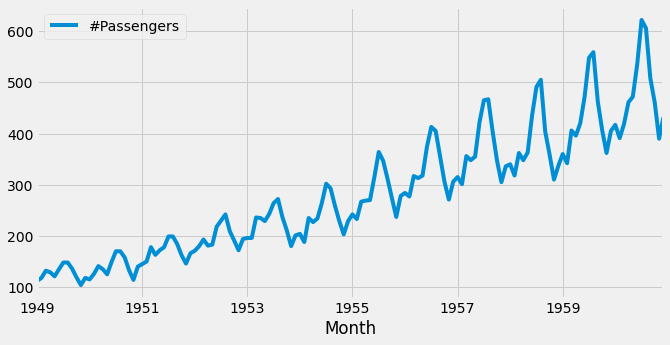

In [ ]:
df1.plot()

In [ ]:
df1 = df1.asfreq('M')
#df2 = df2.asfreq('d')
#df3 = df3.asfreq('d')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMAX model
model = SARIMAX(df1, order=(1, 1, 1), seasonal_order=(1, 0, 1, 7))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -691.898
Date:                           Wed, 17 Aug 2022   AIC                           1393.797
Time:                                   17:26:52   BIC                           1408.611
Sample:                               01-01-1949   HQIC                          1399.816
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3354      0.168     -2.002      0.045      -0.664      -0.007
ma.L1          0.7405      0.126      5.886      0.000       0.494       0.987
ar.S.L7       -0.7790      0.219     -3.549      0.000      -1.209      -0.349
ma.S.L7        0.9934      1.797      0.553      0.580      -2.528       4.515
sigma2       880.5242   1408.906      0.625      0.532   -1880.881    3641.929
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.73   Prob(JB):                         0.70
Heteroskedasticity (H):               7.42   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Create a SARIMAX model
model = SARIMAX(df1, order=(2, 1, 1), seasonal_order=(1, 0, 0, 4))

# Fit the model
results = model.fit(method='bfgs')

# Print the results summary
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


         Current function value: 4.751544
         Iterations: 6
         Function evaluations: 56
         Gradient evaluations: 44


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -684.222
Date:                            Wed, 17 Aug 2022   AIC                           1378.445
Time:                                    17:29:39   BIC                           1393.259
Sample:                                01-01-1949   HQIC                          1384.464
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9786      0.119      8.201      0.000       0.745       1.212
ar.L2         -0.4746      0.109     -4.350      0.000      -0.688      -0.261
ma.L1         -0.7803      0.116     -6.744      0.000      -1.007      -0.554
ar.S.L4       -0.1910      0.101     -1.899      0.058      -0.388       0.006
sigma2       976.6559    141.665      6.894      0.000     698.997    1254.315
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.23
Prob(Q):                              0.87   Prob(JB):                         0.07
Heteroskedasticity (H):               7.67   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Create a SARIMAX model
model = SARIMAX(df1, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -507.457
Date:                              Wed, 17 Aug 2022   AIC                           1020.914
Time:                                      18:17:12   BIC                           1029.539
Sample:                                  01-01-1949   HQIC                          1024.419
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2967      0.080     -3.714      0.000      -0.453      -0.140
ma.S.L12      -0.1031      0.093     -1.112      0.266      -0.285       0.079
sigma2       135.3516     15.012      9.016      0.000     105.929     164.775
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.49
Prob(Q):                              0.96   Prob(JB):                         0.01
Heteroskedasticity (H):               2.55   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Выбор параметров SARIMA order


In [ ]:
aus_employment = pd.read_csv('aus_employment.csv', index_col='date', parse_dates=True)
aus_employment = aus_employment.asfreq('MS')
aus_employment.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


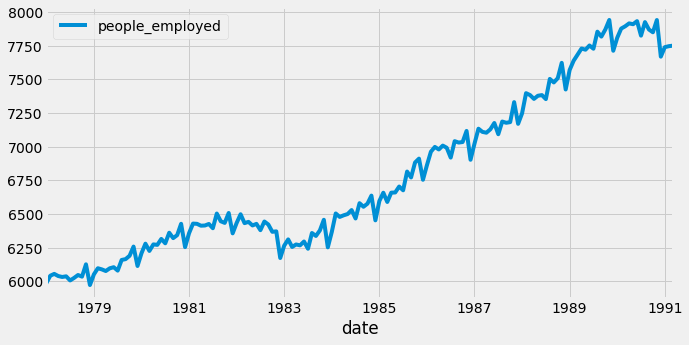

In [ ]:
aus_employment.plot()

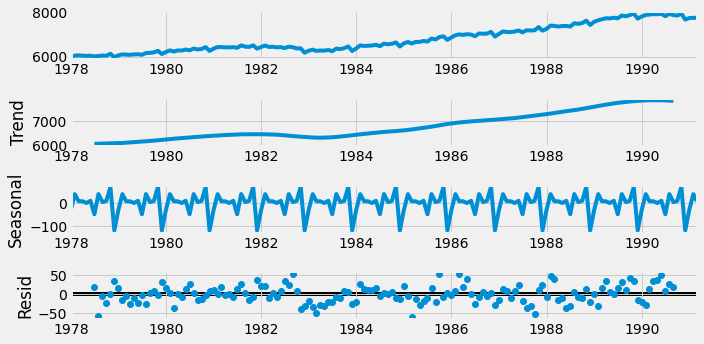

In [ ]:
# Perform additive decomposition
decomp = seasonal_decompose(aus_employment, period=12)

# Plot decomposition
decomp.plot();

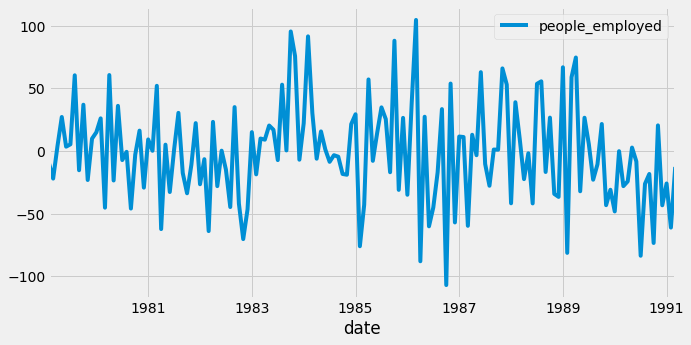

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

aus_employment_diff.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


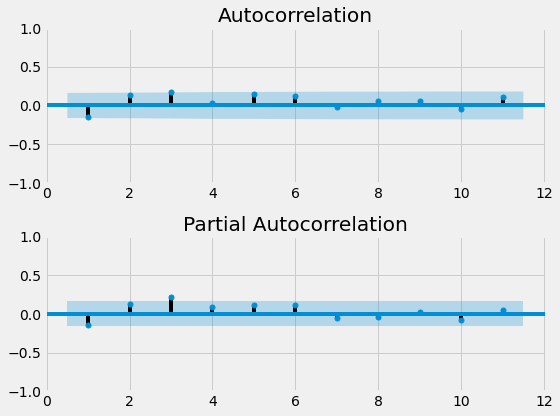

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1);

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2);
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


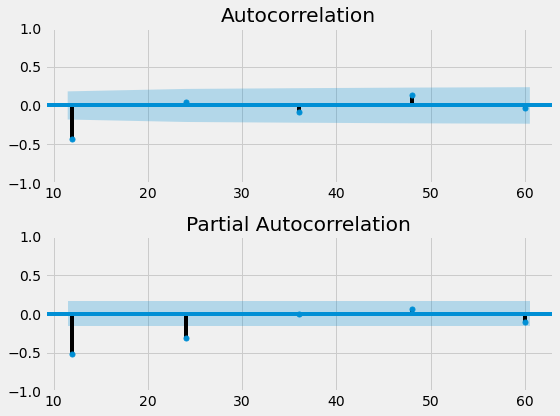

In [ ]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, zero=False, ax=ax1);

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, zero=False, ax=ax2);
plt.tight_layout();

Несезонный ACF не показывает ни одного из обычных шаблонов моделей MA, AR или ARMA, поэтому мы не выбираем ни один из них. Seaosnal ACF и PACF выглядят как модель MA(1). : $\text{SARIMAX}(0,1,0)(0,1,1)_{12}$

In [ ]:
# Create a SARIMAX model
model = SARIMAX(aus_employment_diff, order=(1, 0, 2), seasonal_order=(1, 0, 2, 12))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    people_employed   No. Observations:                  146
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -711.237
Date:                            Wed, 17 Aug 2022   AIC                           1436.474
Time:                                    18:16:10   BIC                           1457.359
Sample:                                02-01-1979   HQIC                          1444.960
                                     - 03-01-1991                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9266      0.066     14.053      0.000       0.797       1.056
ma.L1         -1.1003      0.102    -10.735      0.000      -1.301      -0.899
ma.L2          0.3145      0.089      3.534      0.000       0.140       0.489
ar.S.L12      -0.9946      0.577     -1.724      0.085      -2.125       0.136
ma.S.L12       0.2896      1.022      0.283      0.777      -1.713       2.293
ma.S.L24      -0.6801      0.762     -0.893      0.372      -2.173       0.813
sigma2       930.9967    405.698      2.295      0.022     135.844    1726.150
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.96   Prob(JB):                         0.72
Heteroskedasticity (H):               1.59   Skew:                             0.16
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
results.forecast(steps=10)

1961-01-01    444.758648
1961-02-01    419.603394
1961-03-01    451.096697
1961-04-01    487.705195
1961-05-01    499.939314
1961-06-01    562.011409
1961-07-01    647.650135
1961-08-01    634.451146
1961-09-01    536.647457
1961-10-01    488.824439
Freq: MS, Name: predicted_mean, dtype: float64

### Automated model selection
Пакет «pmdarima» — это мощный инструмент, который поможет вам выбрать параметры модели. 

Помните, что хотя автоматизация обладает мощными возможностями, иногда она может совершать ошибки, которых вы бы не заметили. Трудно предположить, как входные данные могут быть несовершенными и это может повлиять на результаты теста.


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 43.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import  pmdarima as pm
# Create auto_arima model
model1 = pm.auto_arima(aus_employment_diff,
                      seasonal=True, m=24,
                      d=1, D=1,
                      max_p=5, max_q=5,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[24]             : AIC=inf, Time=6.85 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=1416.556, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=1335.881, Time=0.66 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=2.02 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=1369.161, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=1330.428, Time=2.26 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=11.24 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=1327.698, Time=4.52 sec
 ARIMA(1,1,0)(0,1,1)[24]             : AIC=inf, Time=1.72 sec
 ARIMA(1,1,0)(1,1,2)[24]             : AIC=inf, Time=6.54 sec
 ARIMA(1,1,0)(0,1,2)[24]             : AIC=1327.713, Time=3.34 sec
 ARIMA(1,1,0)(2,1,2)[24]             : AIC=inf, Time=13.96 sec
 ARIMA(0,1,0)(1,1,1)[24]             : AIC=1375.929, Time=2.56 sec
 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=6.24 sec
 ARIMA(1,1,1)(1,1,1)[24]             : AIC=inf, Time

### Saving and updating models
После того, как вы получили модель, которая вас устраивает, вы захотите сохранить эту модель, а также включить новые измерения, когда они будут доступны. Это ключевая часть запуска модели в производство.


In [ ]:
import joblib

# Set model name
filename='candy_model.pkl'

# Pickle it
joblib.dump(model1, filename)

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model
loaded_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  146
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 24)   Log Likelihood                -659.849
Date:                              Wed, 17 Aug 2022   AIC                           1327.698
Time:                                      18:04:47   BIC                           1338.882
Sample:                                           0   HQIC                          1332.240
                                              - 146                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5825      0.081     -7.180      0.000      -0.741      -0.423
ar.S.L24      -0.0651      0.172     -0.379      0.705      -0.402       0.272
ma.S.L24      -0.7422      0.307     -2.415      0.016      -1.345      -0.140
sigma2      2682.0300    501.568      5.347      0.000    1698.975    3665.085
===================================================================================
Ljung-Box (L1) (Q):                  10.31   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.00   Prob(JB):                         0.27
Heteroskedasticity (H):               1.18   Skew:                            -0.24
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### SARIMA model diagnostics


In [ ]:
# Create model object
model = SARIMAX(df1, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend='c')

# Fit model
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -507.412
Date:                            Wed, 17 Aug 2022   AIC                           1024.824
Time:                                    18:05:12   BIC                           1039.200
Sample:                                01-01-1949   HQIC                          1030.665
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2309      0.868      0.266      0.790      -1.471       1.933
ar.L1         -0.2357      0.397     -0.594      0.552      -1.013       0.541
ma.L1         -0.0668      0.375     -0.178      0.859      -0.802       0.669
ma.S.L12      -0.1046      0.095     -1.097      0.273      -0.291       0.082
sigma2       135.2498     15.262      8.862      0.000     105.336     165.163
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.81
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               2.56   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

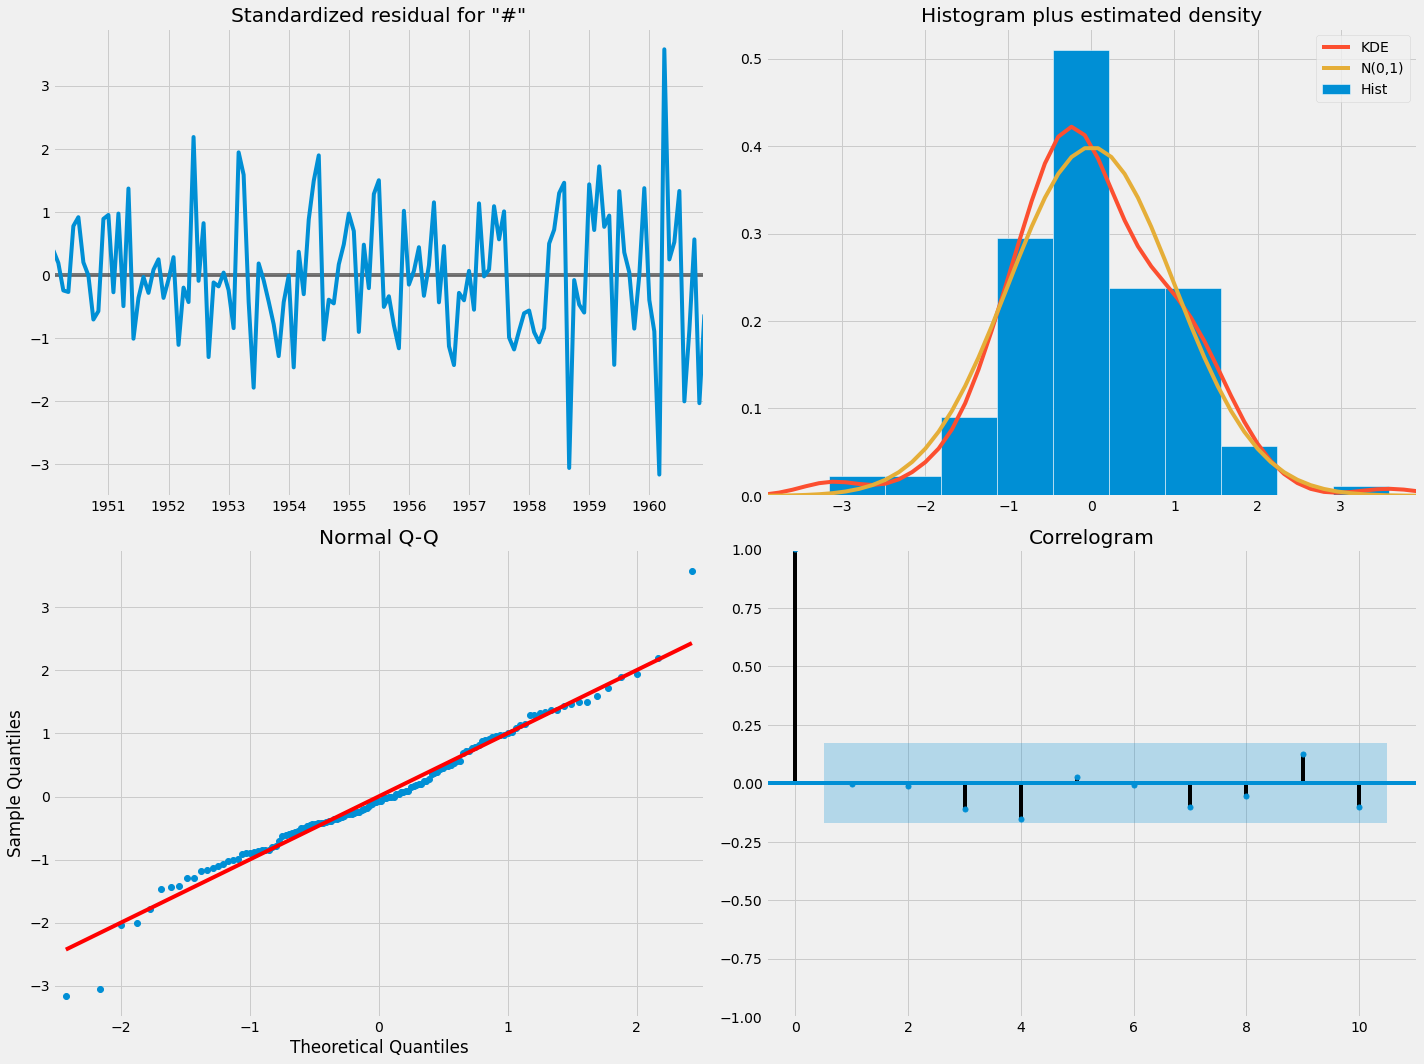

In [ ]:
# Plot common diagnostics
results.plot_diagnostics(figsize=(20, 15));
plt.tight_layout();

### The SARIMAX model

**S** - seasonal\
**AR** - AutoRegressive\
**I** - Integrated\
**MA** - Moving Average\
**X** - Exogenous
